## SVM Checker

In [2]:
!pip install cvxopt

    100% |████████████████████████████████| 5.6MB 245kB/s ta 0:00:011


In [1]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [2]:
def example_linear(num_samples = 100, num_features = 2, grid_size = 20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)

In [3]:
def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.11407418 -0.33341967]
 [-0.78058242 -0.26226274]
 [ 0.23735513  1.81560886]
 [ 0.2205798   0.92912064]
 [ 1.67184576  0.09853   ]
 [ 0.7229624   0.80431462]
 [ 0.19741231 -0.78988367]
 [ 1.48347733 -0.02422902]
 [ 1.02453599  0.90718809]
 [ 0.21689955  1.54014684]
 [-2.15364835  0.67750305]
 [-0.08017432 -1.05210769]
 [-0.25001854 -1.45674099]
 [ 0.27750648  0.04129561]
 [-1.39467724  0.49629384]
 [-0.09160803  1.07808581]
 [-1.24652707 -1.15132734]
 [-0.14537789  0.3473397 ]
 [ 0.1628512   0.44147139]
 [-0.25362503 -0.35111141]
 [ 0.44199479  1.42471152]
 [-0.80118745 -0.41595643]
 [-0.12212869  0.79613793]
 [-0.90178704 -0.40805644]
 [-1.19964931  2.55372991]
 [ 0.87159242  0.37015701]
 [-0.67895893 -1.84514777]
 [ 1.73302363 -0.87103603]
 [-1.0910295  -0.69820046]
 [-0.15059883 -1.06620345]
 [ 0.58630312 -0.32917555]
 [ 0.4415141   0.69242267]
 [-0.63572378 -1.60409637]
 [ 0.31319364 -0.05287473]
 [ 0.34241874  1.08241713]
 [-0.12375303  0.1101463 ]
 [ 1.69712767 -0.23358093]
 

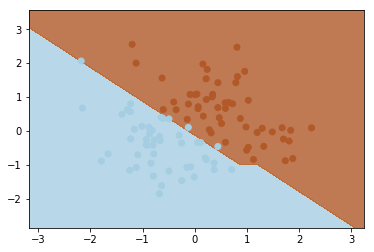

In [4]:
example_linear()